## Practice activity: Implementing and comparing models

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [52]:
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 3, 4, 4, 5, 6, 2, 8, 9, 10, 8],
    'PrevExamScore': [70, 40, 45, 50, 60, 65, 70, 75, 80, 85, 80, 75, 75, 65, 40, 30, 25, 45, 40, 30, 25, 10],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
print(df.head())

   StudyHours  PrevExamScore  Pass
0           1             70     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0


In [62]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']  # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (16, 2), (16,)
Testing data: (6, 2), (6,)


In [63]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.8333333333333334


In [65]:
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
tree_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 0.5


In [66]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
Accuracy: 0.8333333333333334
Confusion Matrix:
[[2 1]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

Decision Tree:
Accuracy: 0.5
Confusion Matrix:
[[2 1]
 [2 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



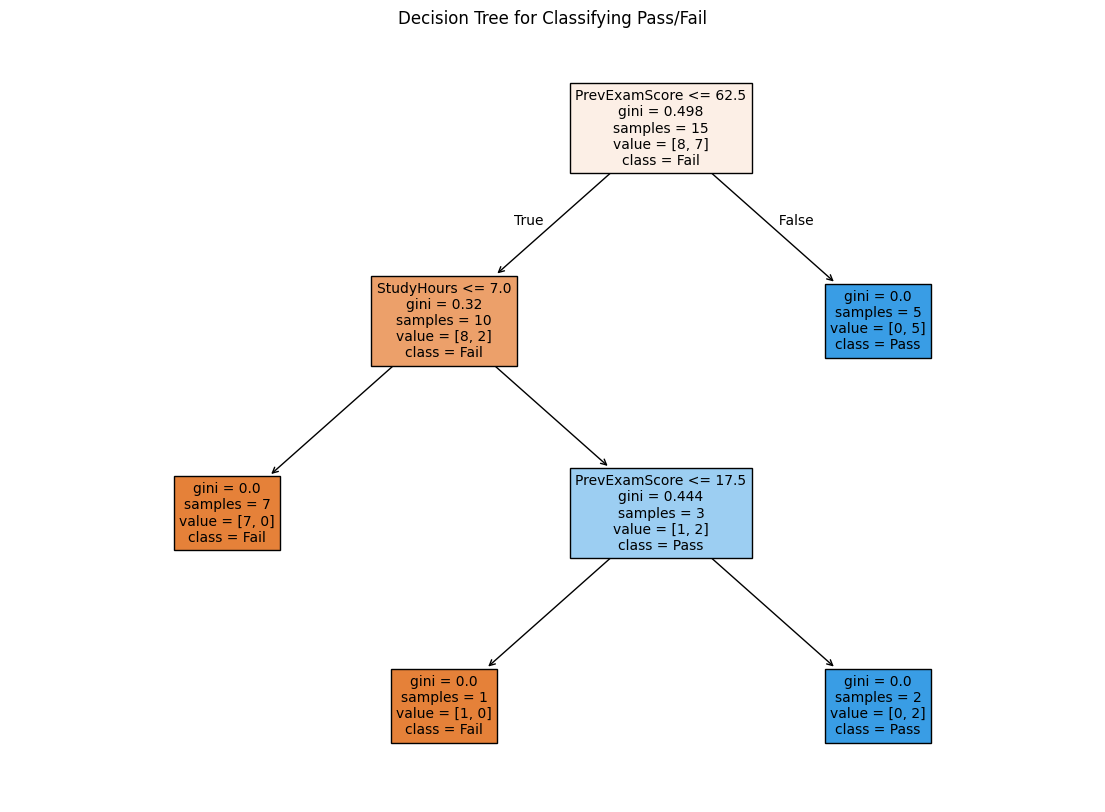

In [51]:
# Visualize the decision tree
plt.figure(figsize=(14,10))
tree.plot_tree(tree_model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True, fontsize=10)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

## Practice activity: Applying transfer learning

In [67]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display dataset information
print(f"Training samples: {x_train.shape[0]}, Validation samples: {x_val.shape[0]}, Test samples: {x_test.shape[0]}")

Training samples: 40000, Validation samples: 10000, Test samples: 10000


C:\Users\Shahram\AppData\Local\Temp\ipykernel_2324\110525043.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.47017857..0.6915975].


First layer with weights: Conv1


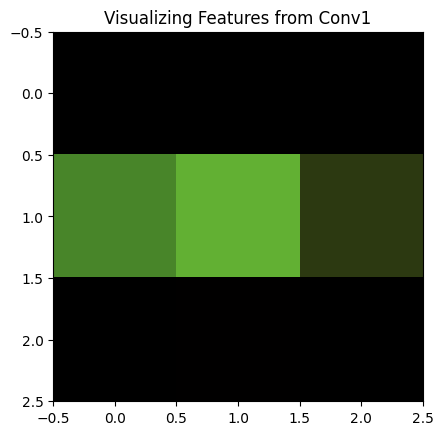

In [69]:
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Display model architecture
base_model.summary()

# Inspect layers and find the first layer with weights
layer_with_weights = None
for layer in base_model.layers:
    if layer.get_weights():
        layer_with_weights = layer
        break

if layer_with_weights:
    print(f"First layer with weights: {layer_with_weights.name}")
    weights = layer_with_weights.get_weights()[0]
    if weights.ndim == 4:  # Check if weights are compatible for visualization
        plt.imshow(weights[:, :, :, 0], cmap='viridis')
        plt.title(f'Visualizing Features from {layer_with_weights.name}')
        plt.show()
    else:
        print(f"Cannot visualize weights from layer {layer_with_weights.name}: incompatible dimensions.")
else:
    print("No layers with weights found in the model.")

In [70]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Print final validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_accuracy:.2f}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.2350 - loss: 2.0970 - val_accuracy: 0.3080 - val_loss: 1.9504
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.2539 - loss: 2.0375 - val_accuracy: 0.3114 - val_loss: 1.9201
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.2604 - loss: 2.0178 - val_accuracy: 0.3134 - val_loss: 1.9123
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.2624 - loss: 2.0094 - val_accuracy: 0.3205 - val_loss: 1.8899
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.2647 - loss: 1.9994 - val_accuracy: 0.3220 - val_loss: 1.8850
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.2707 - loss: 1.9887 - val_accuracy: 0.3241 - val_loss: 1.8868
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.2693 - loss: 1.9861 - val_accuracy: 0.3293 - val_loss: 1.8743
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.2725 -

In [71]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Analyze feature maps from an intermediate layer
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model.input, outputs=base_model.get_layer('block_1_expand_relu').output)
intermediate_output = intermediate_layer_model.predict(x_test[:5])

# Display feature map dimensions
print(f"Feature maps for the first test sample have shape: {intermediate_output[0].shape}")

313/313 - 7s - 21ms/step - accuracy: 0.3306 - loss: 1.8566
Test Accuracy: 0.33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Feature maps for the first test sample have shape: (16, 16, 96)


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Define a baseline model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the baseline model
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_history = baseline_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate the baseline model
baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test, verbose=2)
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

# Summarize comparison
print(f"Transfer Learning Test Accuracy: {test_accuracy:.2f}")
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4785 - loss: 1.4682 - val_accuracy: 0.5483 - val_loss: 1.2702
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.5876 - loss: 1.1753 - val_accuracy: 0.6049 - val_loss: 1.1394
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.6362 - loss: 1.0334 - val_accuracy: 0.6148 - val_loss: 1.1039
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6749 - loss: 0.9284 - val_accuracy: 0.6299 - val_loss: 1.0705
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7054 - loss: 0.8473 - val_accuracy: 0.6414 - val_loss: 1.0631
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7306 - loss: 0.7681 - val_accuracy: 0.6551 - val_loss: 1.0502
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7564 - loss: 0.7009 - val_accuracy: 0.6423 - val_loss: 1.0758
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7800 -

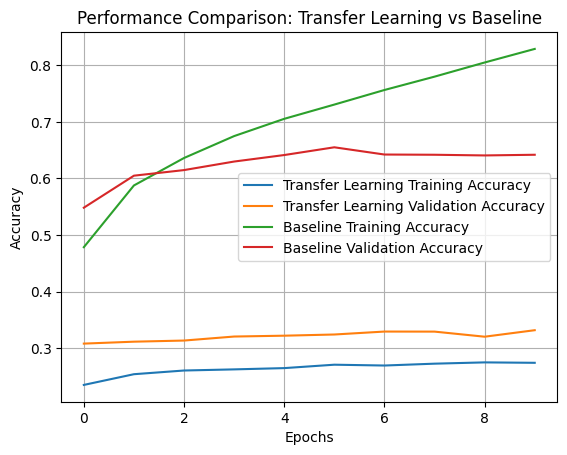

In [73]:
# Compare training and validation accuracy
plt.plot(history.history['accuracy'], label='Transfer Learning Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Transfer Learning Validation Accuracy')
plt.plot(baseline_history.history['accuracy'], label='Baseline Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Performance Comparison: Transfer Learning vs Baseline')
plt.grid(True)  # Add grid for clarity
plt.show()